In [2]:
import matplotlib.pyplot as plt
import scipy.stats
import numpy as np
import pylab
import pandas as pd
import seaborn as sns
import statistics

In [17]:
donnees = pd.read_csv("Musique_quant.csv", sep=";")

In [ ]:
sns.pairplot(data=donnees)

In [ ]:
correlation_matrix = donnees.corr()
plt.figure(figsize=(10, 8))  # Adjust the figure size if needed
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt=".2f")
plt.title('Correlation Heatmap')
plt.show()

In [ ]:
def quant_discret(data):
    effectifs = data.value_counts().sort_index()
    population_size = len(data)
    frequences = effectifs / population_size

    min_val = data.min() # Valeur minimale
    max_val = data.max() # Valeur maximale
    moyenne = data.mean() # Moyenne      
    mode = data.mode() # Mode    
    mediane = data.median() # Médiane
    ecart_type = data.std() # Écart-type    
    variance = data.var() # Variance  
    etendue = max_val - min_val  # Étendue
    
    quantiles = data.quantile([0.25, 0.5, 0.75])
    #iqr = quantiles[0] - quantiles[2] # Écart interquartile

    data.describe()

    print("valeur minimale : ", min_val)
    print("valeur maximale : ", max_val)
    print("moyenne : ", moyenne)
    print("mode : ", mode)
    print("médiane : ", mediane)
    print("écart-type : ", ecart_type)
    print("variance : ", variance)
    print("étendue : ", etendue)
    print("quantiles : \n", quantiles)

    # If any slice of the pie is less than 5%, plot a histogram instead
    if any(frequences < 0.05):
        plt.hist(data, bins='auto')
        plt.title("Histogramme de " + data.name)
        plt.xlabel(data.name)
        plt.ylabel("Effectifs")
        plt.show()
    else:
        effectifs.plot(kind='pie', autopct='%1.1f%%')
        plt.title("Diagramme circulaire de " + data.name)
        plt.ylabel("")
        plt.show()

    sns.ecdfplot(data)
    plt.title("Fonction de répartition empirique de " + data.name)
    plt.xlabel(data.name)
    plt.ylabel("Fréquence cumulée")
    plt.show()

    plt.boxplot(data)
    plt.title("Boxplot de " + data.name)
    plt.xlabel(data.name)
    plt.show()


In [ ]:
quant_discret(donnees["Mode"])
quant_discret(donnees["Disc Number"])
quant_discret(donnees["Time Signature"])
quant_discret(donnees["Explicit"])

In [5]:
def etude_univariee(data, variable_name, K=0):
    # Vérifier si la variable existe dans le DataFrame
    if variable_name not in data.columns:
        raise ValueError(f"La variable '{variable_name}' n'existe pas dans le DataFrame.")
    
    def calculate_bins(data_column, num_classes):
        n = len(data_column)  # Size of the population
        if num_classes == 0:  # If K is not specified by the user
            num_classes = int(np.ceil(1 + np.log2(n)))  # Number of classes according to the Sturges formula
        e = data_column.max() - data_column.min()  # Range
        bins = np.linspace(data_column.min(), data_column.max(), num_classes + 1)  # Bins for distribution
        return bins

    # Calcul des bins pour la variable choisie
    bins = calculate_bins(data[variable_name].dropna(), K)  # Supprimer les NaN pour calculer les bins

    # Assignation des classes aux données
    data[f'{variable_name}_classe'] = pd.cut(data[variable_name], bins=bins, include_lowest=True)

    # Choix d'une palette de couleurs
    palette = sns.color_palette("viridis", n_colors=len(bins))

    # Visualisations détaillées pour la variable choisie avec répartition en classes
    fig, ax = plt.subplots(1, 2, figsize=(14, 6))

    # Histogramme de la variable avec classes
    sns.histplot(data, x=variable_name, bins=bins, kde=True, ax=ax[0], color=palette[0])
    ax[0].set_title(f"Histogramme de {variable_name} avec classes", fontsize=16)
    ax[0].set_xlabel(f"{variable_name.capitalize()}", fontsize=14)
    ax[0].set_ylabel('Fréquence', fontsize=14)

    # Boîte à moustaches pour la variable avec classes
    sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
    ax[1].set_title(f"Boîte à moustaches pour {variable_name} avec classes", fontsize=16)
    ax[1].set_xlabel(f"Classe de {variable_name}", fontsize=14)
    ax[1].set_ylabel(f"{variable_name.capitalize()}", fontsize=14)
    ax[1].tick_params(axis='x', rotation=45)

    plt.tight_layout()
    plt.show()
    
# Exemple d'utilisation de la fonction
# chemin = "C:\\Users\\eliza\\Downloads\\Jeu_FIFA_modifie_clean.csv"
# data = pd.read_csv(chemin, sep=';')
# etude_univariee(data, 'age')
# etude_univariee(data, 'value_euro')

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


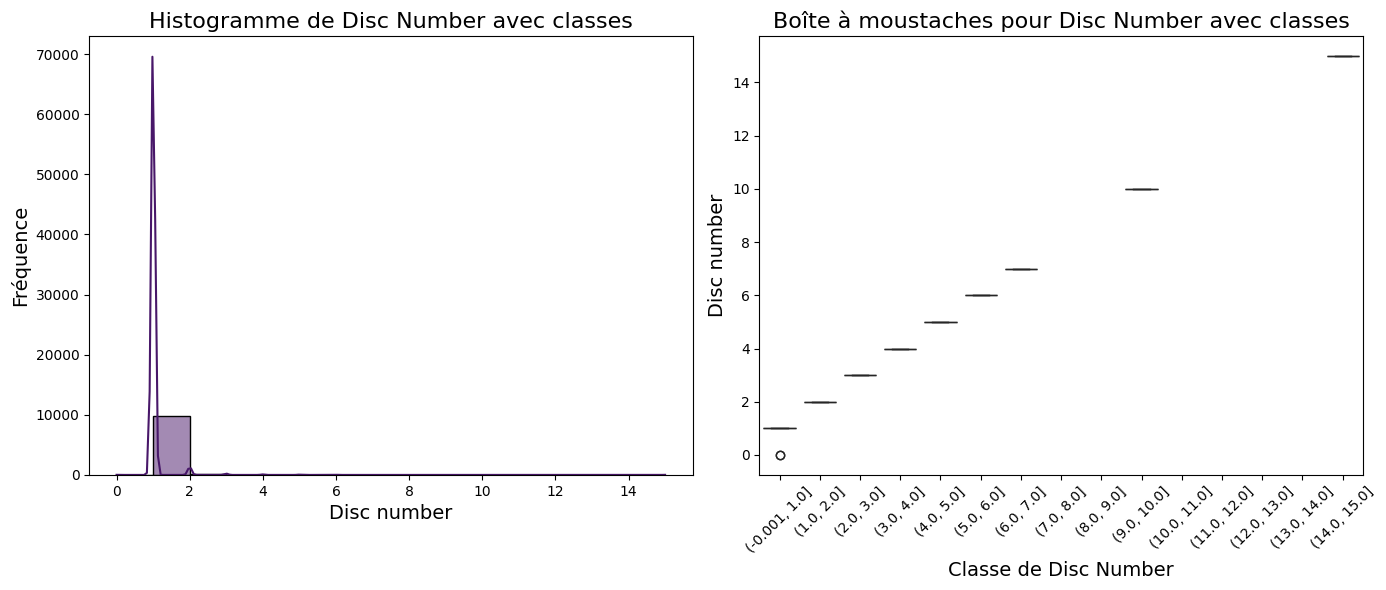

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


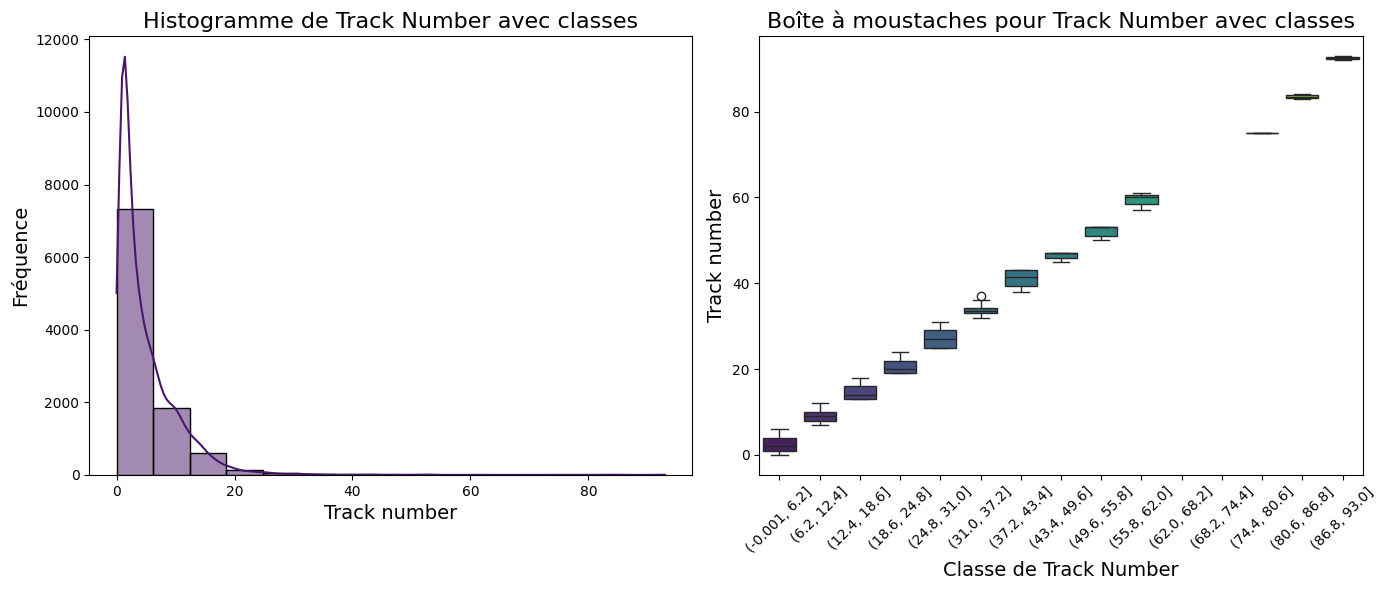

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


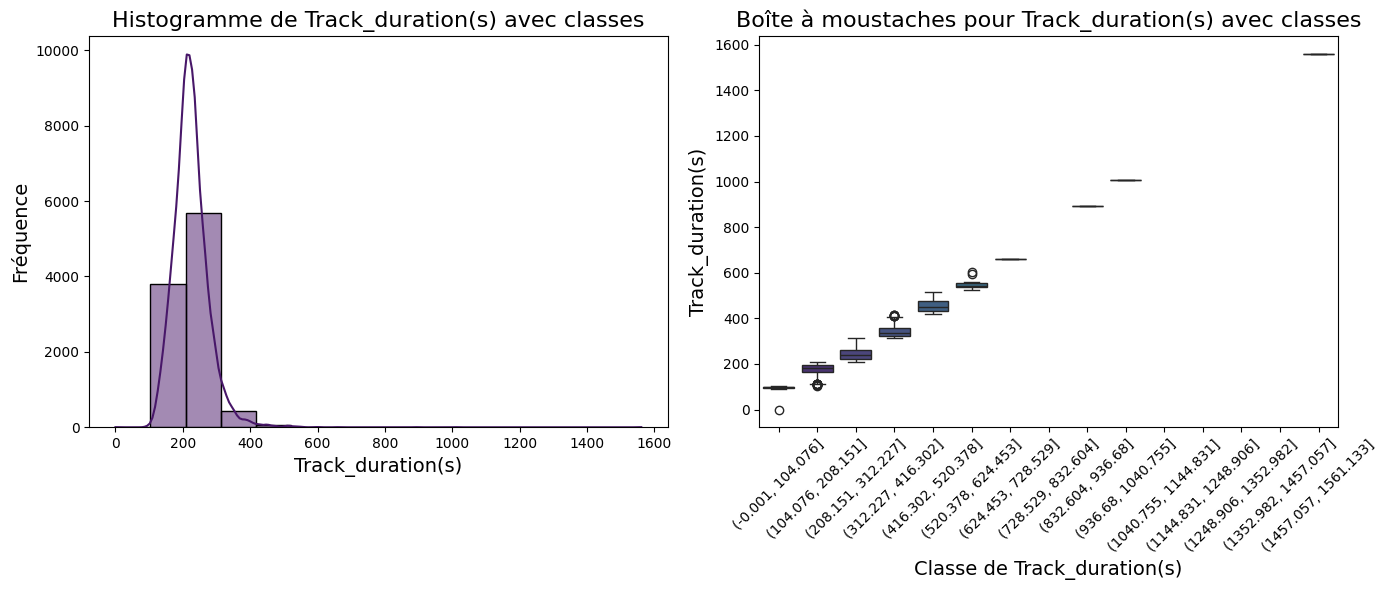

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


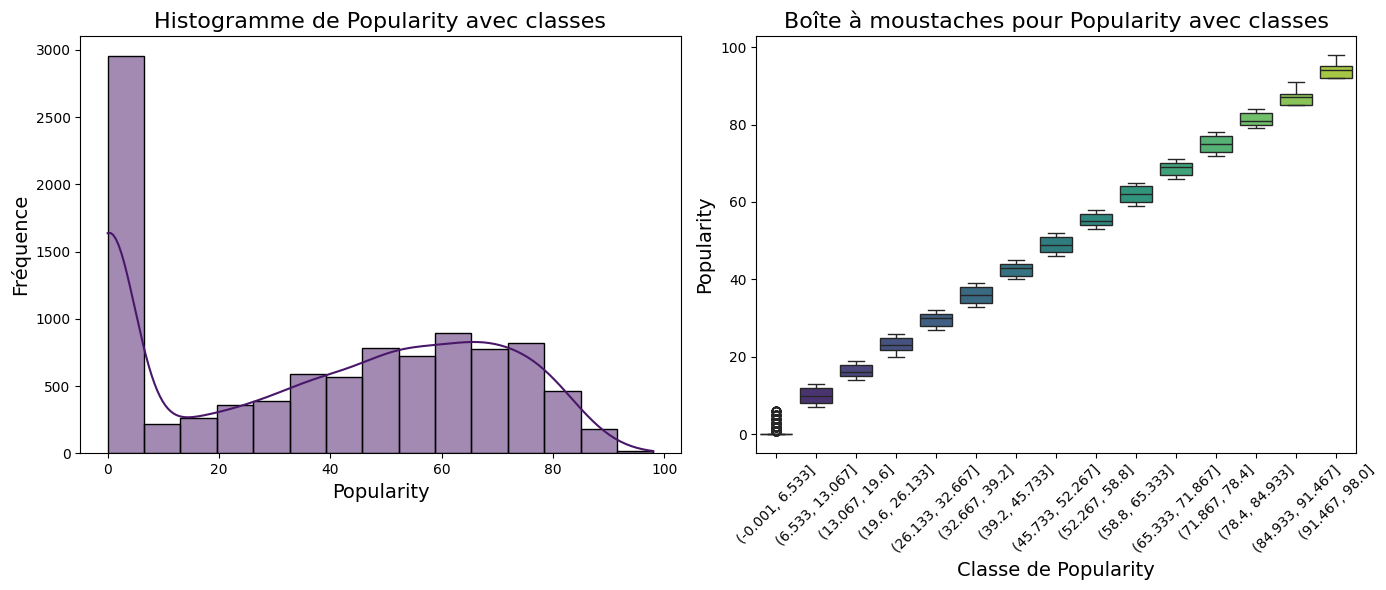

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


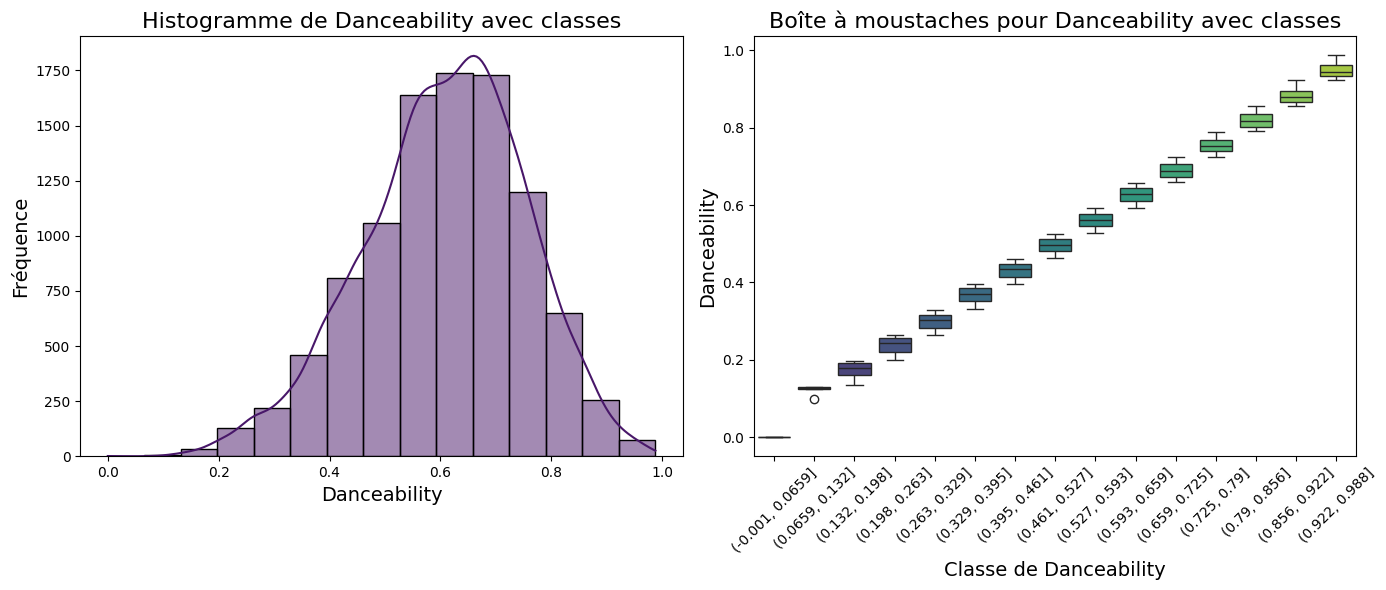

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


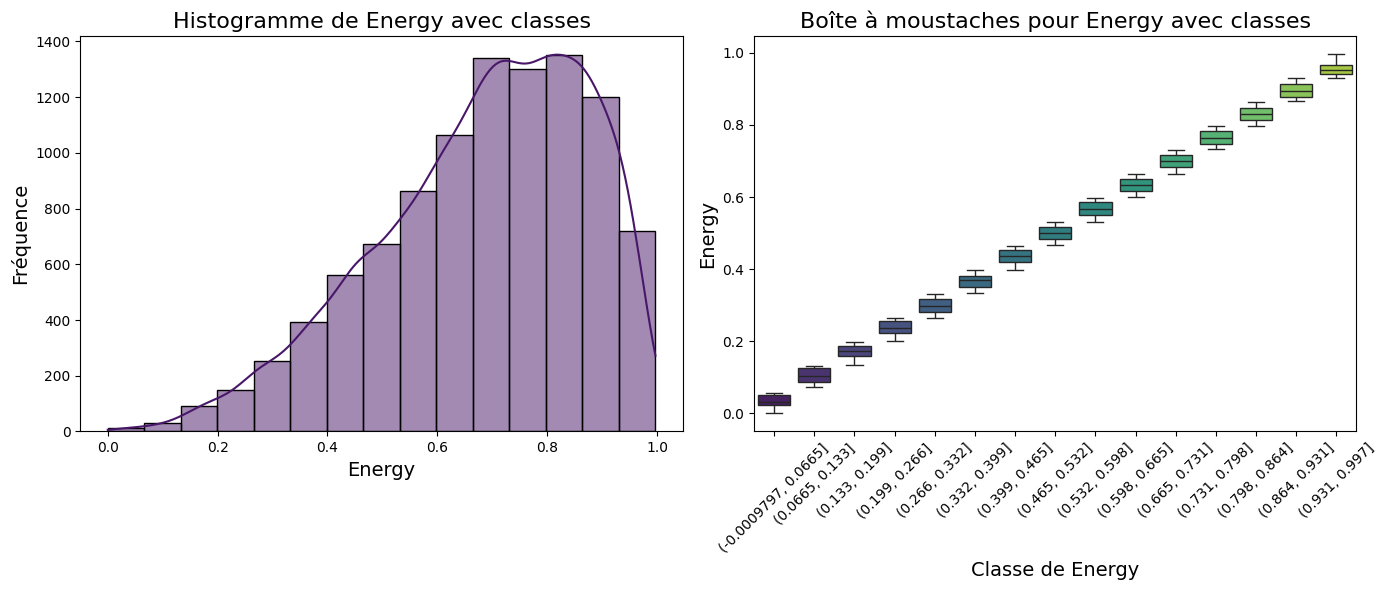

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


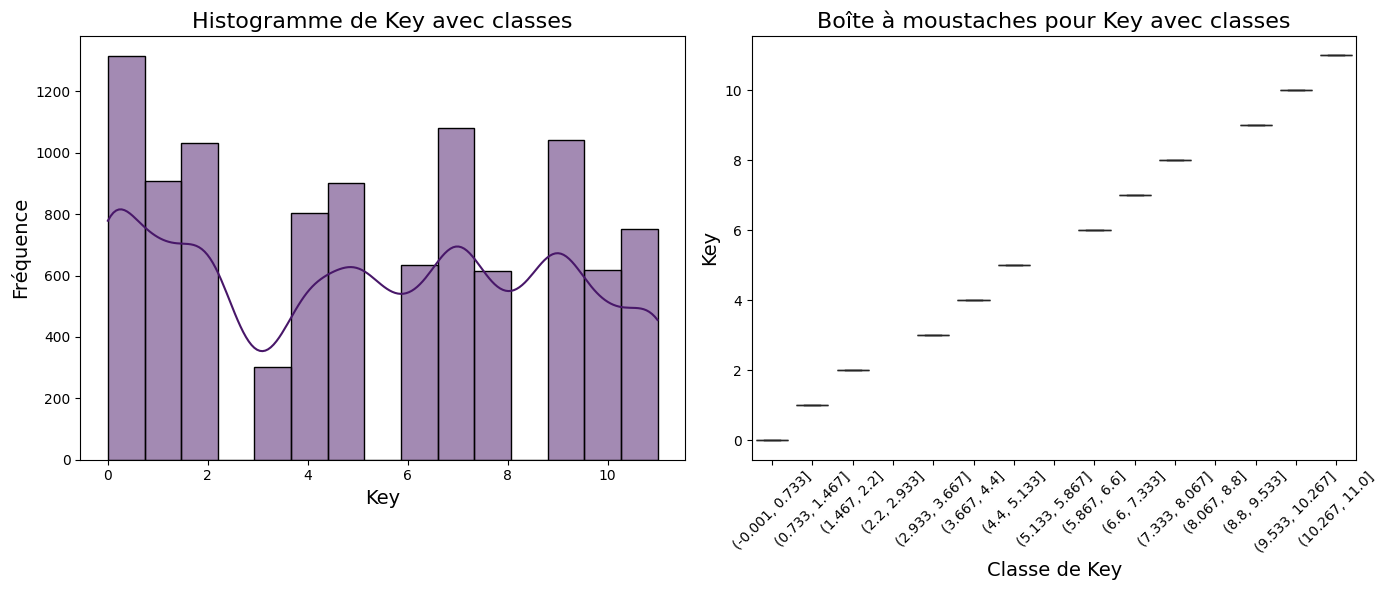

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


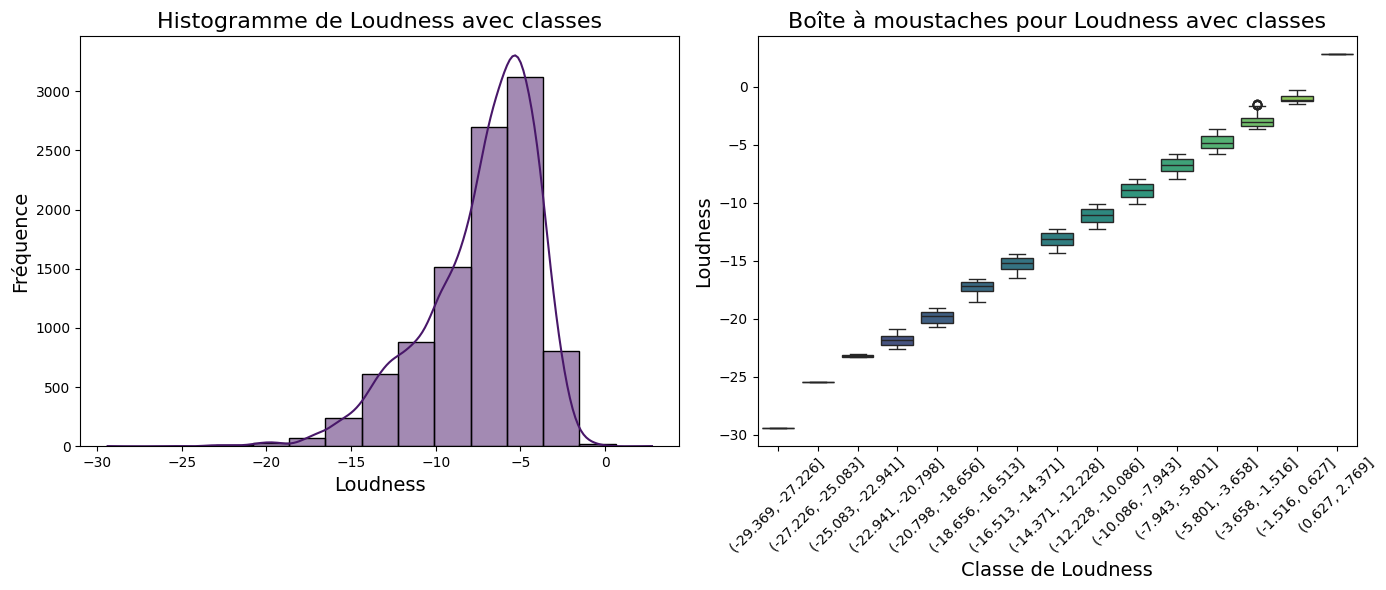

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


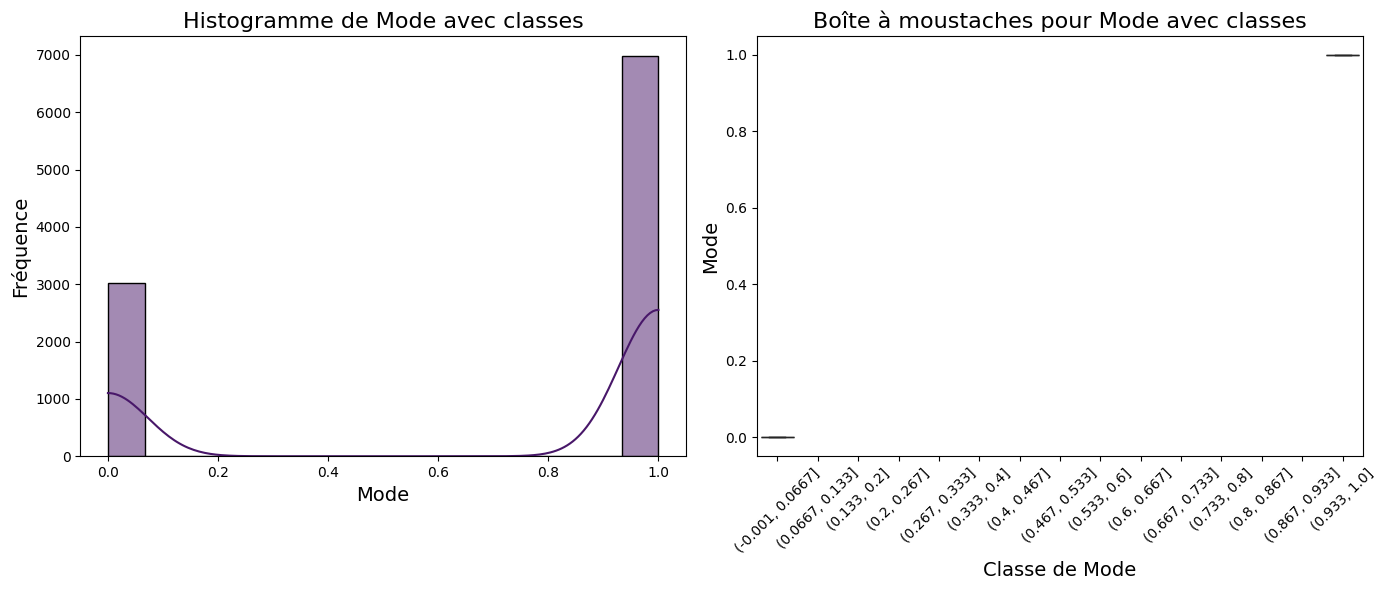

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


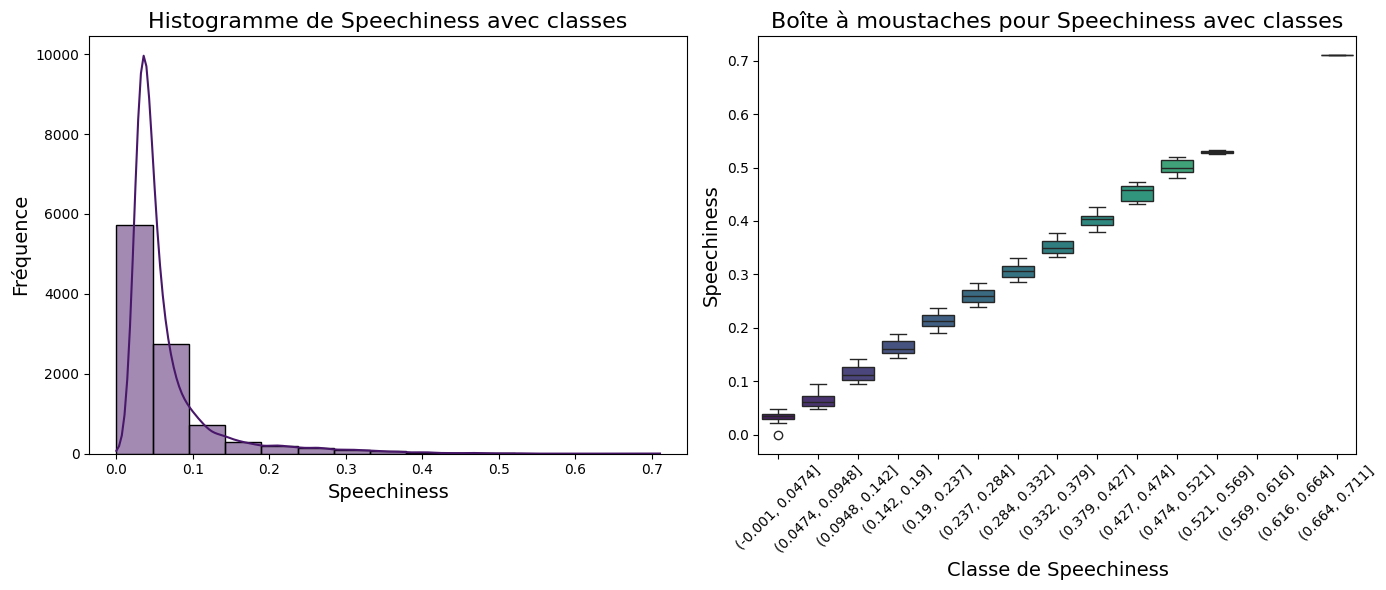

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


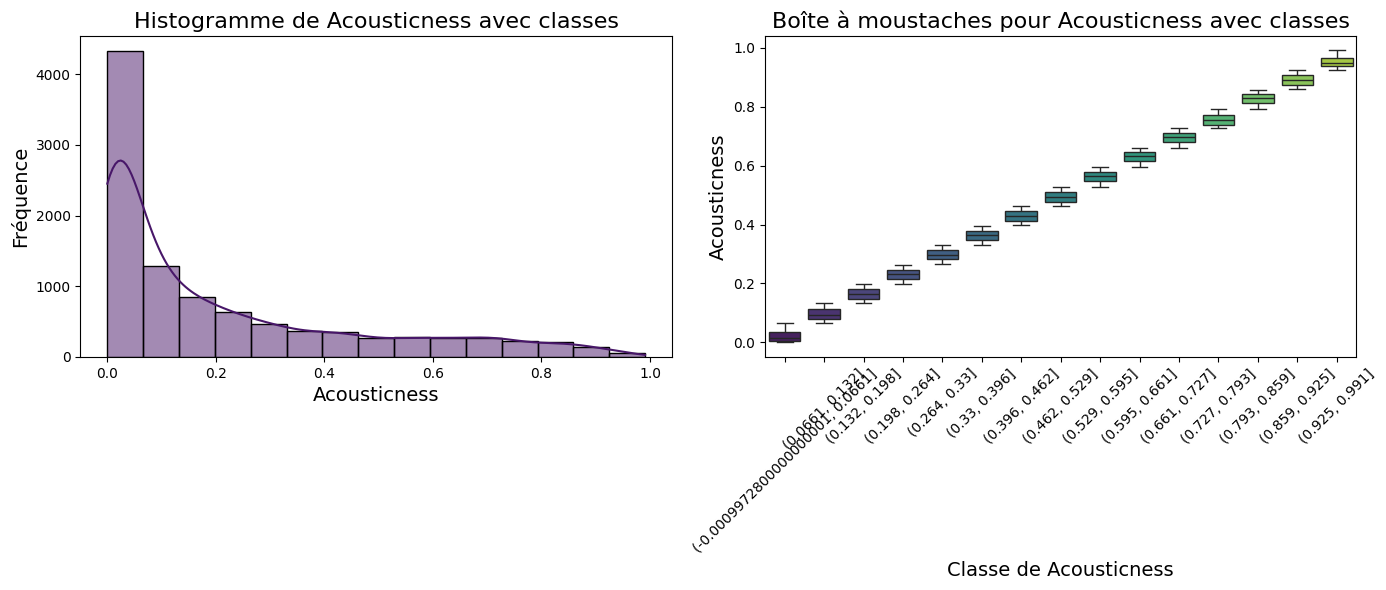

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


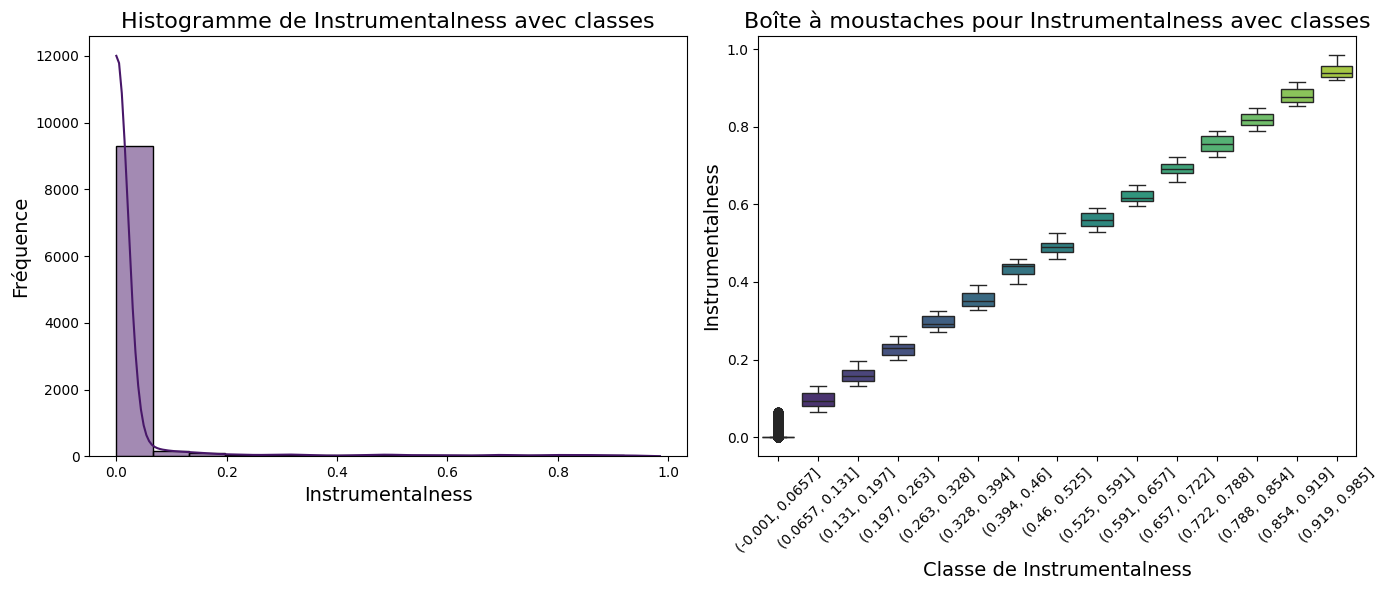

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


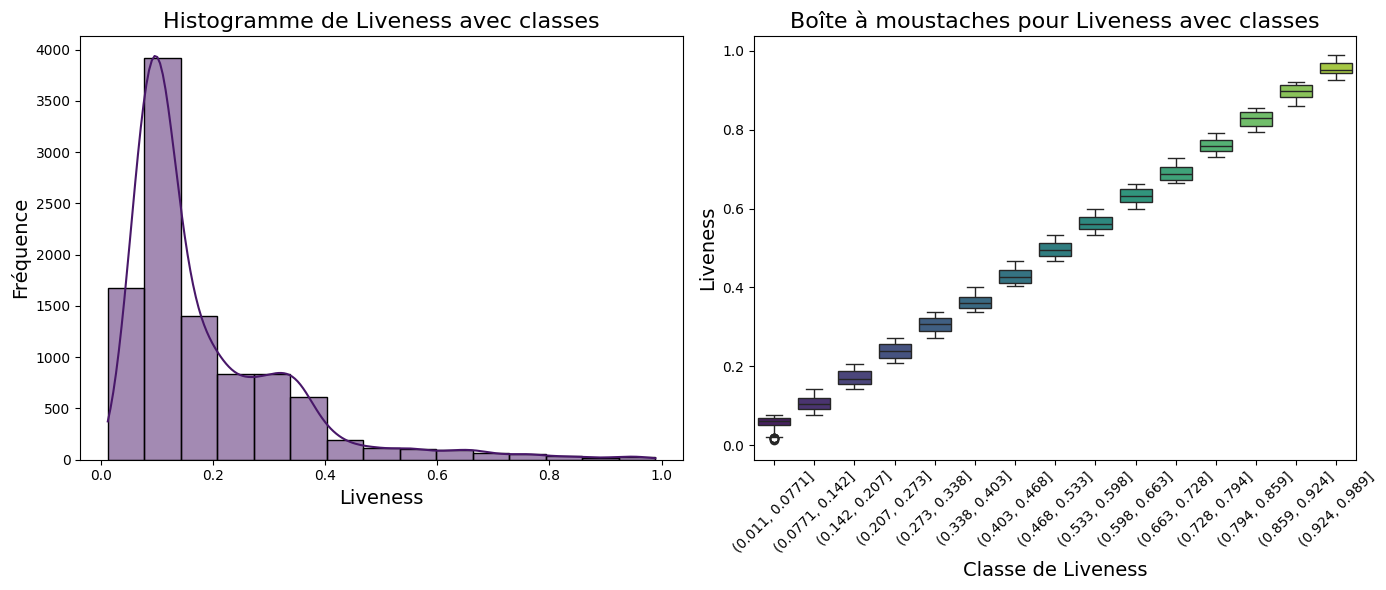

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


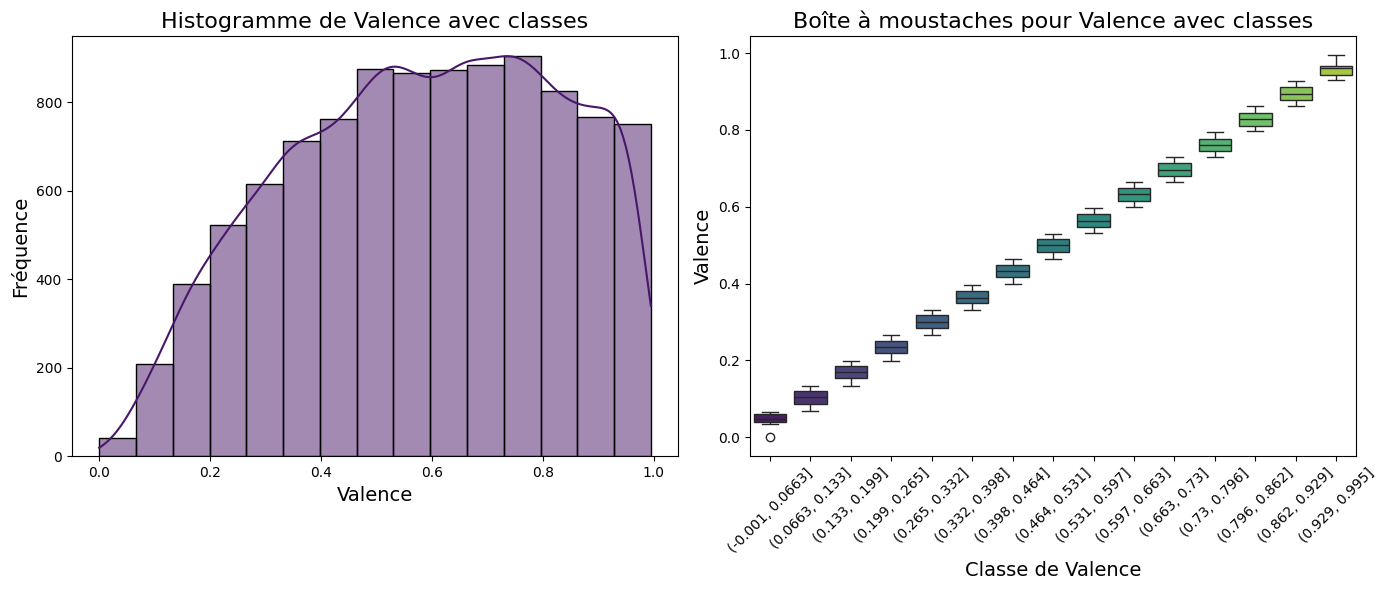

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


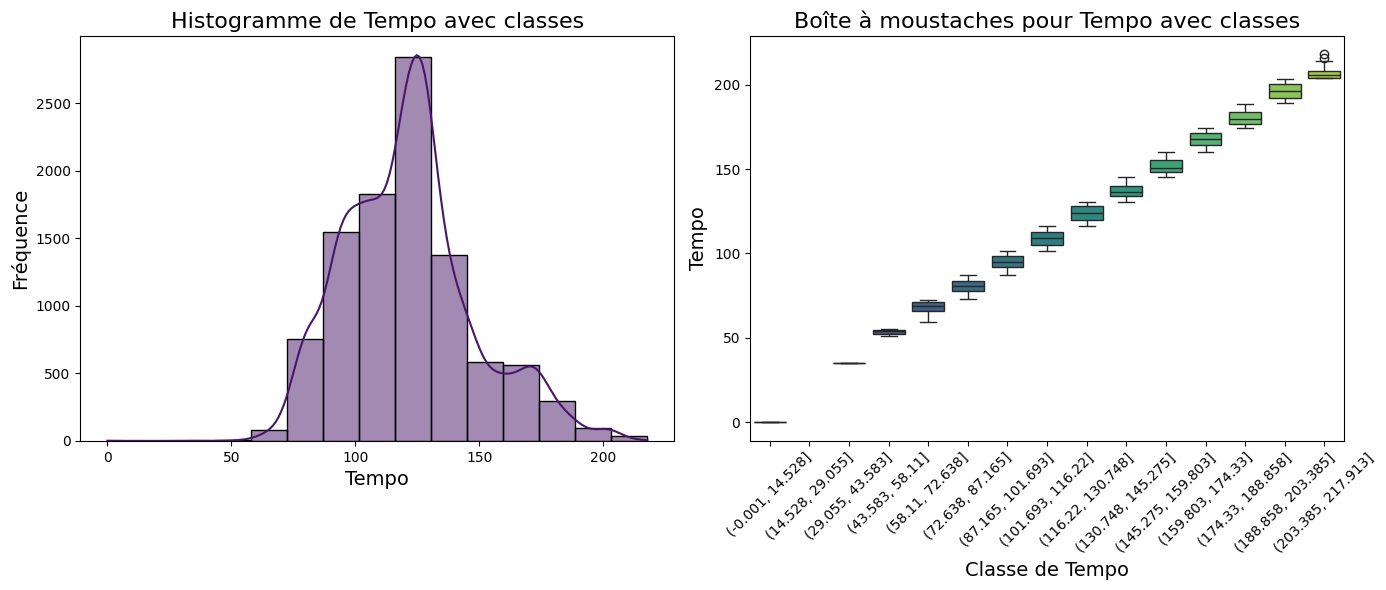

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


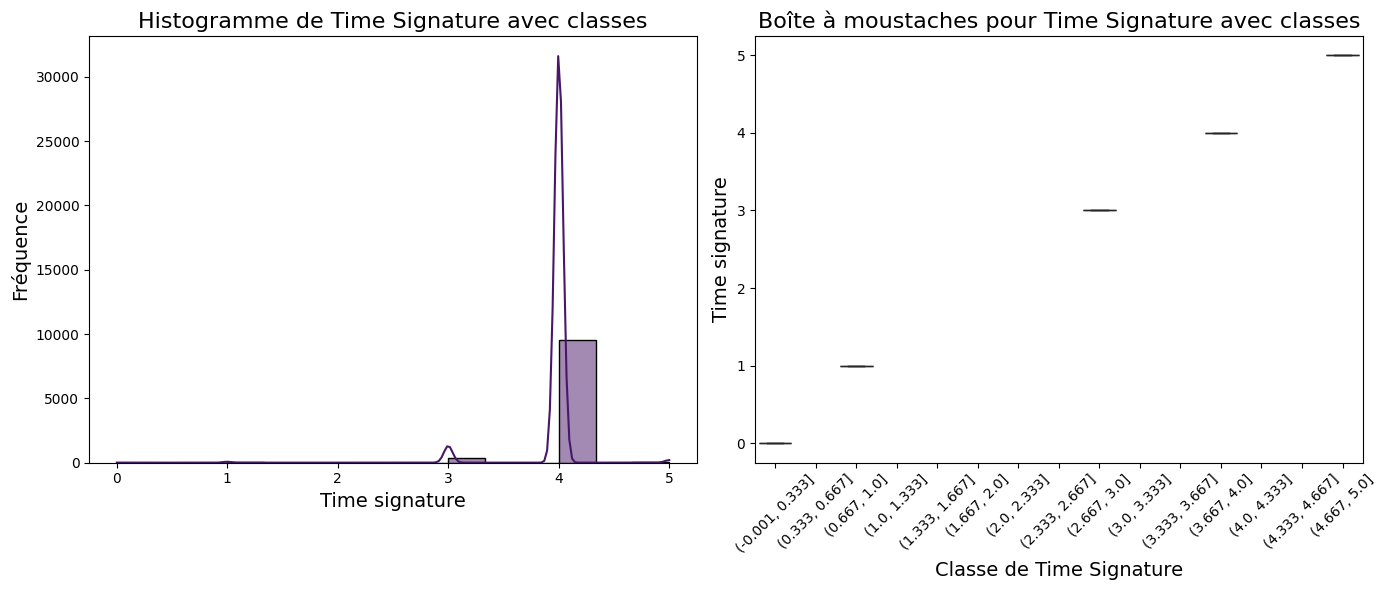

C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)
C:\Users\alexa\AppData\Local\Temp\ipykernel_16816\634536027.py:33: UserWarning: The palette list has more values (16) than needed (15), which may not be intended.
  sns.boxplot(x=f'{variable_name}_classe', y=variable_name, data=data, ax=ax[1], palette=palette)


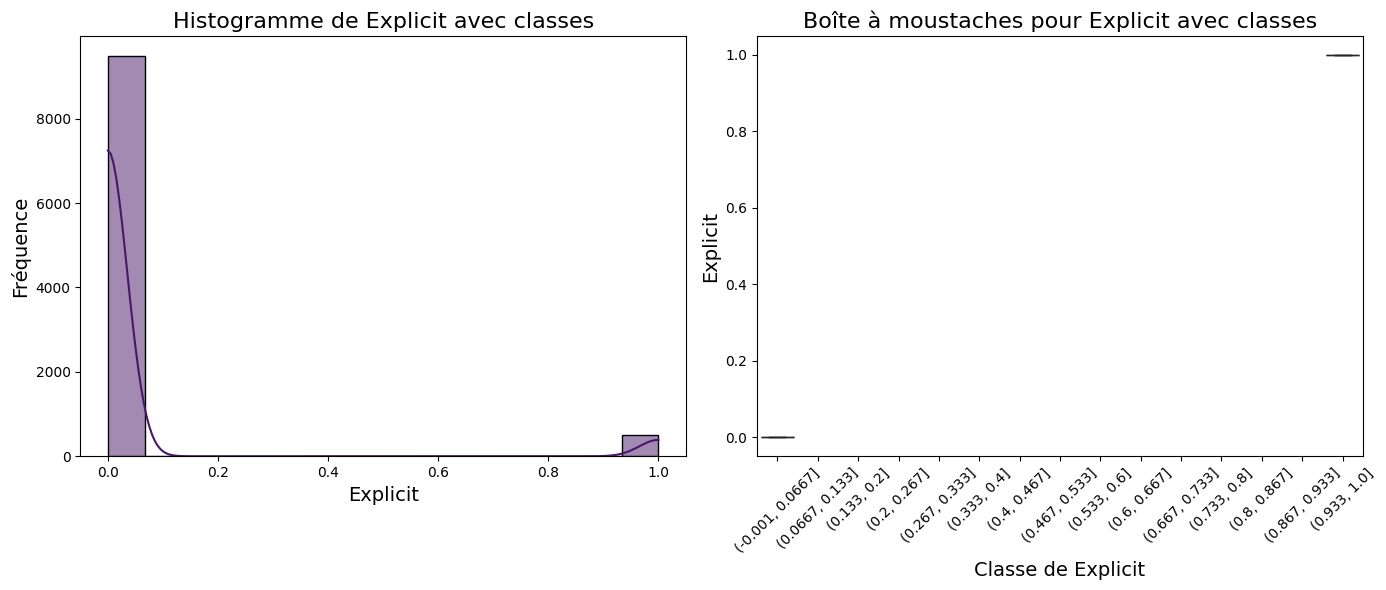

In [18]:
for column in donnees.columns:
    etude_univariee(donnees, column)